In [75]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Part 1: Prepare the Data

In [76]:
# read csv file
myopia_df =  pd.read_csv("Resources/myopia.csv")
myopia_df.head() 

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [77]:
# remove Myopic column
myopia_clean = myopia_df.drop(["MYOPIC"], axis=1)
myopia_clean.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [78]:
for column in myopia_clean.columns:
    print(f"Column {column} has {myopia_clean[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [79]:
from sklearn.preprocessing import StandardScaler
# standardizing the dataset so that the columns taht contain larger values do not influence the outcome more than columns with smaller values
myopia_scaled = StandardScaler().fit_transform(myopia_clean)
print(myopia_scaled)

[[-4.20219106e-01 -1.36391690e+00 -8.92861464e-01 ...  4.98303926e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -3.08612235e-01 -1.71839800e-01 ... -8.75087555e-01
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01  6.04386289e-01 -9.97682023e-03 ... -7.50233784e-01
  -1.01302987e+00 -9.96768974e-01]
 ...
 [-4.20219106e-01  1.65169621e+00  6.52187361e-01 ... -1.37450264e+00
   9.87137728e-01  1.00324150e+00]
 [-4.20219106e-01 -2.17472219e-01 -8.48716244e-01 ... -1.88391815e-01
  -1.01302987e+00 -9.96768974e-01]
 [-4.20219106e-01  1.58339808e-03 -3.48415042e-01 ... -7.50233784e-01
   9.87137728e-01  1.00324150e+00]]


# Part 2: Apply Dimensionality Reduction

In [80]:

# Perform dimensionality reduction with PCA preserving 90% of the explained variance ( n_components=0.90)
# Initialize PCA model
pca = PCA(n_components=0.90)
myopia_pca = pca.fit_transform(myopia_scaled)

In [81]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [82]:
# Transform PCA data to a DataFrame
new_df = pd.DataFrame(data=myopia_pca, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7","principal component 8",
                                                                 "principal component 9","principal component 10"])
new_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [109]:
from sklearn.manifold import TSNE
# Further reduce the dataset dimensions with t-SNE
# Initialize t-SNE model

tsne = TSNE(learning_rate = 35)

# reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

# ensuring the dimensions are now 2

tsne_features.shape

c:\Users\erics\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

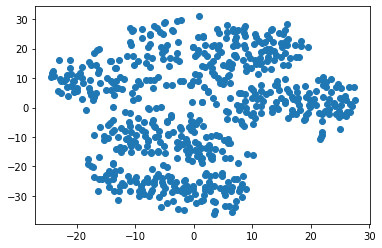

In [110]:
#first column of transformed features
myopia_clean["x"] = tsne_features[:,0]

#second column of transformed features
myopia_clean["y"] = tsne_features[:,1]


plt.scatter(myopia_clean["x"],myopia_clean["y"])
plt.show()

In [111]:
labels = myopia_df["MYOPIC"]
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

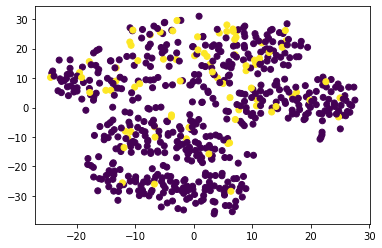

In [112]:
# Visualize the clusters with color
plt.scatter(myopia_clean["x"],myopia_clean["y"], c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [113]:
from sklearn.cluster import KMeans

c:\Users\erics\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


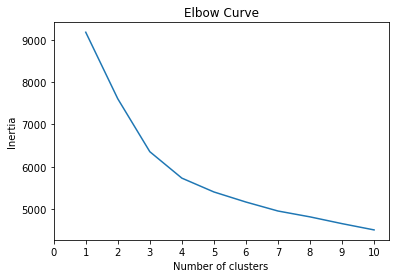

In [114]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [115]:
df_elbow.head()

,k,inertia
0,1,9174.983015
1,2,7605.643488
2,3,6357.585488
3,4,5734.066678
4,5,5407.985710


In [116]:
# at which value of K the elbow appears

def myclusters(k, new_df):
# Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

# fit the model
    model.fit(new_df)

# Predict clusters
    predictions = model.predict(new_df)

# Add the predicted class columns
    new_df["myopic"] = model.labels_
    
    return new_df

In [123]:
# identifying the clusters with the best K
clusters = myclusters(4,new_df)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


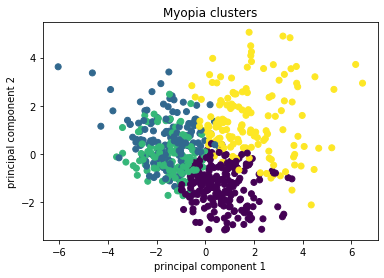

In [124]:
# visualize the clusters

plt.scatter(x=new_df["principal component 1"],y=new_df["principal component 2"], c =new_df["myopic"])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("Myopia clusters")
plt.show()
    

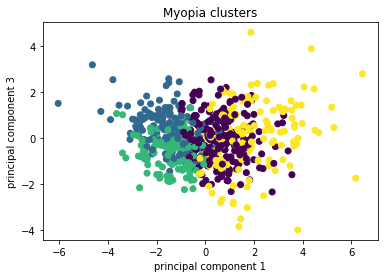

In [125]:
# visualize the clusters

plt.scatter(x=new_df["principal component 1"],y=new_df["principal component 3"], c =new_df["myopic"])
plt.xlabel("principal component 1")
plt.ylabel("principal component 3")
plt.title("Myopia clusters")
plt.show()

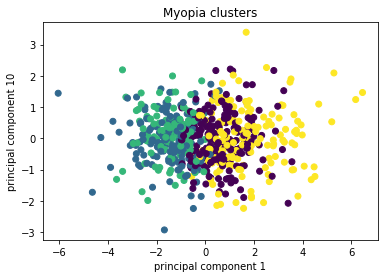

In [126]:
# visualize the clusters

plt.scatter(x=new_df["principal component 1"],y=new_df["principal component 10"], c =new_df["myopic"])
plt.xlabel("principal component 1")
plt.ylabel("principal component 10")
plt.title("Myopia clusters")
plt.show()

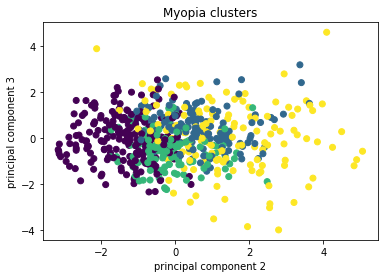

In [127]:
# visualize the clusters

plt.scatter(x=new_df["principal component 2"],y=new_df["principal component 3"], c =new_df["myopic"])
plt.xlabel("principal component 2")
plt.ylabel("principal component 3")
plt.title("Myopia clusters")
plt.show()

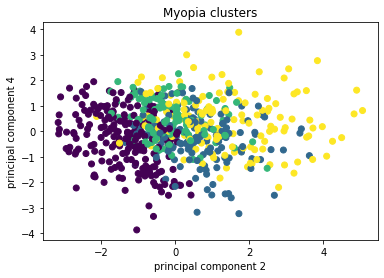

In [128]:
# visualize the clusters

plt.scatter(x=new_df["principal component 2"],y=new_df["principal component 4"], c =new_df["myopic"])
plt.xlabel("principal component 2")
plt.ylabel("principal component 4")
plt.title("Myopia clusters")
plt.show()

# Part 4: Make a Recommendation

Can the patients be clustered? If so, into how many clusters?

The optimal point for the number of clusters on the curve seems to be 4 but I could not show a conclusive cluster using the scaled down data.